In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
from matplotlib.font_manager import FontProperties
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import warnings 
from gensim.test.utils import datapath
import operator
from gensim.test.utils import datapath

#sns.set_style("darkgrid",{"axes.axisbelow" : False })
warnings.simplefilter('ignore')

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
df = pd.read_csv('reviews_cleaned.tsv', sep ='\t', usecols=['asin', 'cleaned_text'], nrows = 30)

In [4]:
df = df.dropna()

In [5]:
# Convert to list
data = df.cleaned_text.values.tolist()

In [6]:
for i in range(len(data)):
    data[i] = data[i].split()

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data, min_count=5, threshold=100) # higher threshold fewer phrases.
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(data)

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [9]:
mallet_path = 'mallet-2.0.8/bin/mallet'

-------------------4
--------------------5


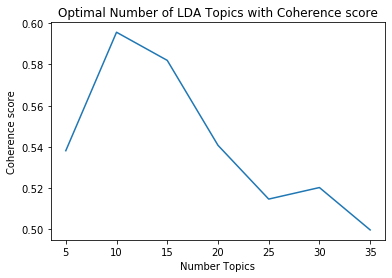

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 0)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

print('-------------------4')
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=5, limit=40, step=5)

print('--------------------5')
limit = 40; start = 5; step = 5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number Topics")
plt.ylabel("Coherence score")
plt.title('Optimal Number of LDA Topics with Coherence score')
plt.show()

In [11]:
topic = {}
i = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    topic[m] = cv, i
    highest = max(topic.items(), key=operator.itemgetter(1))[1][1]
    coherence = max(topic.items(), key=operator.itemgetter(1))[1][0]
    maxNum  =  max(topic.items(), key=operator.itemgetter(1))[0]
    i+=1
optimal_model = model_list[highest]
model_topics = optimal_model.show_topics(formatted=False)
ldamodel=optimal_model
corpus=corpus

Num Topics = 5  has Coherence Value of 0.5382
Num Topics = 10  has Coherence Value of 0.5956
Num Topics = 15  has Coherence Value of 0.582
Num Topics = 20  has Coherence Value of 0.5408
Num Topics = 25  has Coherence Value of 0.5147
Num Topics = 30  has Coherence Value of 0.5203
Num Topics = 35  has Coherence Value of 0.4997


In [12]:


sent_topics_df = pd.DataFrame()

for i,row in enumerate(ldamodel[corpus]):
    for j,(topic_num,prop_topic) in enumerate(row):
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df.at[i,'prop of topic ' + str(topic_num)] = round(prop_topic,4)
    sent_topics_df.at[i,'keywords'] = topic_keywords

In [13]:
LDA = pd.concat([df,sent_topics_df],axis=1)
LDA

,asin,cleaned_text,prop of topic 0,prop of topic 1,prop of topic 2,prop of topic 3,prop of topic 4,prop of topic 5,prop of topic 6,prop of topic 7,prop of topic 8,prop of topic 9,keywords
0,1713353,book winner boys enjoy picture story classic,0.1053,0.0897,0.0877,0.1053,0.1033,0.1189,0.0877,0.1053,0.1072,0.0897,"year, teacher, make, grandson, men, giggle, su..."
1,1713353,king mouse cheese nancy gurney excellent child...,0.1175,0.0762,0.0487,0.0781,0.1230,0.0588,0.2700,0.0900,0.0624,0.0753,"year, teacher, make, grandson, men, giggle, su..."
2,1713353,daughter get first copy greatgrandmother fathe...,0.0866,0.1111,0.1487,0.1307,0.0866,0.1160,0.0784,0.0931,0.0735,0.0752,"year, teacher, make, grandson, men, giggle, su..."
3,1713353,remember book child year ago remember wonderfu...,0.0861,0.0903,0.1486,0.0903,0.0708,0.1000,0.0625,0.1444,0.1125,0.0944,"year, teacher, make, grandson, men, giggle, su..."
4,1713353,remember one favorites childhood great conditi...,0.0806,0.0806,0.0878,0.1039,0.0824,0.1523,0.0968,0.1541,0.0806,0.0806,"year, teacher, make, grandson, men, giggle, su..."
5,1713353,cute book great illustrationswith enjoyable st...,0.0877,0.0877,0.0975,0.1072,0.0877,0.1053,0.0877,0.1033,0.1306,0.1053,"year, teacher, make, grandson, men, giggle, su..."
6,1713353,kid love,0.1154,0.0962,0.0962,0.0962,0.1154,0.0962,0.0962,0.0962,0.0962,0.0962,"year, teacher, make, grandson, men, giggle, su..."
7,1713353,happy find thank offering,0.0943,0.1216,0.0943,0.1048,0.0943,0.0943,0.0943,0.0943,0.1132,0.0943,"year, teacher, make, grandson, men, giggle, su..."
8,1713353,good condition,0.0962,0.1068,0.0962,0.0962,0.0962,0.1218,0.0962,0.0962,0.0983,0.0962,"year, teacher, make, grandson, men, giggle, su..."
9,1713353,student year old love book definitely recommen...,0.0893,0.0893,0.0913,0.1071,0.1071,0.0893,0.1071,0.0893,0.1071,0.1230,"year, teacher, make, grandson, men, giggle, su..."
